In [1]:
import os
import numpy as np
import cv2
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import tensorflow as tf

from tqdm import tqdm
from keras_tqdm import TQDMNotebookCallback

Using TensorFlow backend.


## Load & Preprocess Dataset

In [2]:
def normalize(img):
    return (img.astype(float) - 128) / 128

def preprocess(img):
    return normalize(cv2.cvtColor(cv2.resize(img, (224,224)), cv2.COLOR_BGR2RGB))

In [3]:
path = 'rev 2/Grayscale 300px/'
filenames = os.listdir(path)
len(filenames)

750

In [31]:
targets = {
    'cloud': 0,
    'oval': 1,
    'square': 2,
}

X = []
y = []

In [34]:
for filename in tqdm(filenames):
    label = filename.split(' ')[0]    
    img = cv2.imread(path+filename)
    img = preprocess(img)
    X.append(img)
    y.append(targets[label])
    
unique, count = np.unique(y, return_counts=True)

100%|███████████████████████████████████████████████████████████████████████████████| 750/750 [00:01<00:00, 525.49it/s]


## Class Distribution
- 0 -> Cloud
- 1 -> Oval
- 2 -> Square

<BarContainer object of 3 artists>

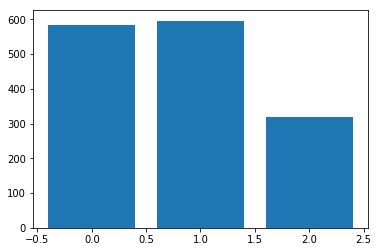

In [35]:
plt.bar(unique, count)

In [6]:
X = np.asarray(X)
y = tf.keras.utils.to_categorical(y)

X.shape, y.shape

((750, 224, 224, 3), (750, 3))

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=42)

## Train VGG16 Model

In [8]:
model = tf.keras.applications.VGG16(
    include_top=True,
    weights=None,
    input_tensor=None,
    input_shape=X.shape[1:],
    pooling=None,
    classes=y.shape[1],
)

In [9]:
model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [10]:
model.compile(optimizer='sgd',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [11]:
checkpoint = tf.keras.callbacks.ModelCheckpoint(filepath='model.h5', 
                                                monitor='val_loss', 
                                                verbose=1, 
                                                save_best_only=True, 
                                                mode='auto')

earlystop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', 
                                             min_delta=0, 
                                             patience=8, 
                                             verbose=1, 
                                             mode='auto',
                                             baseline=None, 
                                             restore_best_weights=False)

callbacks = [checkpoint, earlystop, TQDMNotebookCallback()]

In [12]:
history = model.fit(x=X_train,
                    y=y_train,
                    batch_size=8,
                    epochs=30,
                    validation_data=(X_test, y_test),
                    verbose=2,
                    callbacks=callbacks)

Train on 600 samples, validate on 150 samples


Epoch 1/30

Epoch 00001: val_loss improved from inf to 1.07181, saving model to model.h5
600/600 - 26s - loss: 1.0854 - accuracy: 0.3850 - val_loss: 1.0718 - val_accuracy: 0.3867


Epoch 2/30

Epoch 00002: val_loss improved from 1.07181 to 1.06123, saving model to model.h5
600/600 - 22s - loss: 1.0694 - accuracy: 0.3833 - val_loss: 1.0612 - val_accuracy: 0.3867


Epoch 3/30

Epoch 00003: val_loss improved from 1.06123 to 1.05906, saving model to model.h5
600/600 - 23s - loss: 1.0655 - accuracy: 0.3900 - val_loss: 1.0591 - val_accuracy: 0.3867


Epoch 4/30

Epoch 00004: val_loss improved from 1.05906 to 1.05857, saving model to model.h5
600/600 - 23s - loss: 1.0650 - accuracy: 0.3867 - val_loss: 1.0586 - val_accuracy: 0.5600


Epoch 5/30

Epoch 00005: val_loss did not improve from 1.05857
600/600 - 18s - loss: 1.0634 - accuracy: 0.3950 - val_loss: 1.0590 - val_accuracy: 0.3867


Epoch 6/30

Epoch 00006: val_loss improved from 1.05857 to 1.05579, saving model to model.h5
600/600 - 22s - loss: 1.0636 - accuracy: 0.4050 - val_loss: 1.0558 - val_accuracy: 0.4333


Epoch 7/30

Epoch 00007: val_loss did not improve from 1.05579
600/600 - 18s - loss: 1.0614 - accuracy: 0.4083 - val_loss: 1.0575 - val_accuracy: 0.3867


Epoch 8/30

Epoch 00008: val_loss improved from 1.05579 to 1.05291, saving model to model.h5
600/600 - 22s - loss: 1.0601 - accuracy: 0.4067 - val_loss: 1.0529 - val_accuracy: 0.5200


Epoch 9/30

Epoch 00009: val_loss improved from 1.05291 to 1.04979, saving model to model.h5
600/600 - 22s - loss: 1.0566 - accuracy: 0.4533 - val_loss: 1.0498 - val_accuracy: 0.3867


Epoch 10/30

Epoch 00010: val_loss improved from 1.04979 to 1.03305, saving model to model.h5
600/600 - 22s - loss: 1.0495 - accuracy: 0.4367 - val_loss: 1.0330 - val_accuracy: 0.5467


Epoch 11/30

Epoch 00011: val_loss improved from 1.03305 to 0.98766, saving model to model.h5
600/600 - 22s - loss: 1.0268 - accuracy: 0.5000 - val_loss: 0.9877 - val_accuracy: 0.5533


Epoch 12/30

Epoch 00012: val_loss improved from 0.98766 to 0.72111, saving model to model.h5
600/600 - 22s - loss: 0.9128 - accuracy: 0.5283 - val_loss: 0.7211 - val_accuracy: 0.6600


Epoch 13/30

Epoch 00013: val_loss improved from 0.72111 to 0.67489, saving model to model.h5
600/600 - 22s - loss: 0.6197 - accuracy: 0.7550 - val_loss: 0.6749 - val_accuracy: 0.8133


Epoch 14/30

Epoch 00014: val_loss improved from 0.67489 to 0.31121, saving model to model.h5
600/600 - 22s - loss: 0.4469 - accuracy: 0.8417 - val_loss: 0.3112 - val_accuracy: 0.8800


Epoch 15/30

Epoch 00015: val_loss did not improve from 0.31121
600/600 - 18s - loss: 0.3199 - accuracy: 0.8833 - val_loss: 0.5242 - val_accuracy: 0.7333


Epoch 16/30

Epoch 00016: val_loss improved from 0.31121 to 0.20548, saving model to model.h5
600/600 - 22s - loss: 0.2963 - accuracy: 0.8783 - val_loss: 0.2055 - val_accuracy: 0.9133


Epoch 17/30

Epoch 00017: val_loss improved from 0.20548 to 0.18314, saving model to model.h5
600/600 - 23s - loss: 0.2419 - accuracy: 0.9100 - val_loss: 0.1831 - val_accuracy: 0.9133


Epoch 18/30

Epoch 00018: val_loss did not improve from 0.18314
600/600 - 18s - loss: 0.2141 - accuracy: 0.9167 - val_loss: 0.2265 - val_accuracy: 0.9067


Epoch 19/30

Epoch 00019: val_loss did not improve from 0.18314
600/600 - 18s - loss: 0.1871 - accuracy: 0.9383 - val_loss: 0.9136 - val_accuracy: 0.6667


Epoch 20/30

Epoch 00020: val_loss improved from 0.18314 to 0.15869, saving model to model.h5
600/600 - 23s - loss: 0.1612 - accuracy: 0.9400 - val_loss: 0.1587 - val_accuracy: 0.9333


Epoch 21/30

Epoch 00021: val_loss did not improve from 0.15869
600/600 - 18s - loss: 0.1548 - accuracy: 0.9433 - val_loss: 0.1858 - val_accuracy: 0.9333


Epoch 22/30

Epoch 00022: val_loss improved from 0.15869 to 0.14598, saving model to model.h5
600/600 - 23s - loss: 0.1264 - accuracy: 0.9500 - val_loss: 0.1460 - val_accuracy: 0.9467


Epoch 23/30

Epoch 00023: val_loss improved from 0.14598 to 0.11400, saving model to model.h5
600/600 - 23s - loss: 0.1126 - accuracy: 0.9567 - val_loss: 0.1140 - val_accuracy: 0.9467


Epoch 24/30

Epoch 00024: val_loss did not improve from 0.11400
600/600 - 18s - loss: 0.0968 - accuracy: 0.9683 - val_loss: 0.1219 - val_accuracy: 0.9533


Epoch 25/30

Epoch 00025: val_loss improved from 0.11400 to 0.10335, saving model to model.h5
600/600 - 22s - loss: 0.0652 - accuracy: 0.9817 - val_loss: 0.1034 - val_accuracy: 0.9600


Epoch 26/30

Epoch 00026: val_loss did not improve from 0.10335
600/600 - 18s - loss: 0.0546 - accuracy: 0.9817 - val_loss: 0.1689 - val_accuracy: 0.9400


Epoch 27/30

Epoch 00027: val_loss did not improve from 0.10335
600/600 - 18s - loss: 0.0512 - accuracy: 0.9783 - val_loss: 0.1068 - val_accuracy: 0.9533


Epoch 28/30

Epoch 00028: val_loss improved from 0.10335 to 0.09588, saving model to model.h5
600/600 - 22s - loss: 0.0530 - accuracy: 0.9850 - val_loss: 0.0959 - val_accuracy: 0.9600


Epoch 29/30

Epoch 00029: val_loss did not improve from 0.09588
600/600 - 18s - loss: 0.0272 - accuracy: 0.9900 - val_loss: 0.1909 - val_accuracy: 0.9600


Epoch 30/30

Epoch 00030: val_loss improved from 0.09588 to 0.08202, saving model to model.h5
600/600 - 22s - loss: 0.0274 - accuracy: 0.9950 - val_loss: 0.0820 - val_accuracy: 0.9667



In [20]:
# plot accuracy and loss
def plotgraph(epochs, acc, val_acc, title='Model Accuracy', y_label='Accuracy'):
    # Plot training & validation accuracy values
    plt.plot(epochs, acc, 'b')
    plt.plot(epochs, val_acc, 'r')
    plt.title(title)
    plt.ylabel(y_label)
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Val'], loc='upper left')
    plt.show()

In [21]:
loss = history.history['loss']
val_loss = history.history['val_loss']
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
len(loss), len(val_loss), len(acc), len(val_acc)

(30, 30, 30, 30)

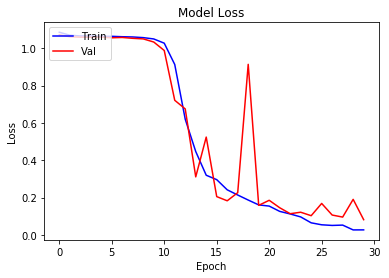

In [23]:
plotgraph(range(len(loss)), loss, val_loss, title='Model Loss', y_label='Loss')

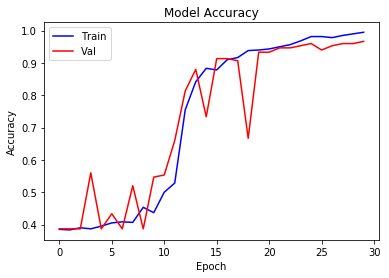

In [24]:
plotgraph(range(len(acc)), acc, val_acc)

In [18]:
np.save('X_test', X_test)

In [19]:
np.save('y_test', y_test)